In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mne 
import os




In [2]:
VHDR = 'Exp_Mediation_Paradigm3_Motor_vp01.vhdr'
EEG = 'Exp_Mediation_Paradigm3_Motor_vp01.eeg'
VRMK = 'Exp_Mediation_Paradigm3_Motor_vp01.vrmk'

In [3]:
raw = mne.io.read_raw_brainvision(VHDR)

Extracting parameters from Exp_Mediation_Paradigm3_Motor_vp01.vhdr...
Setting channel info structure...


C:\Users\George\AppData\Local\Temp\ipykernel_10624\1713186092.py:1: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(VHDR)
C:\Users\George\AppData\Local\Temp\ipykernel_10624\1713186092.py:1: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (500.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(VHDR)


In [4]:
data = raw.get_data()

In [5]:
print(data.shape)# Вывод формы массива (количество каналов, количество отсчетов)

(69, 715760)


In [6]:
raw.crop()

<RawBrainVision | Exp_Mediation_Paradigm3_Motor_vp01.eeg, 69 x 715760 (715.8 s), ~74 kB, data not loaded>

In [7]:
(11*60+56)*1000 #

716000

In [30]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['Laser/L  1', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S  9', 'Toggle/T  2', 'Toggle/T  3']


In [9]:
event_id

{'Laser/L  1': 10001,
 'New Segment/': 99999,
 'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  3': 3,
 'Stimulus/S  5': 5,
 'Stimulus/S  6': 6,
 'Stimulus/S  8': 8,
 'Stimulus/S  9': 9,
 'Toggle/T  2': 10002,
 'Toggle/T  3': 10003}

In [24]:
events[1]

array([[     0,      0,  99999],
       [  9965,      0,      5],
       [  9990,      0,      3],
       [ 10998,      0,  10001],
       [ 11590,      0,  10003],
       [ 12668,      0,  10002],
       [ 20916,      0,      2],
       [ 21927,      0,  10001],
       [ 22496,      0,  10003],
       [ 24445,      0,  10002],
       [ 29934,      0,      2],
       [ 30937,      0,  10001],
       [ 31364,      0,  10003],
       [ 33141,      0,  10002],
       [ 38852,      0,      3],
       [ 39857,      0,  10001],
       [ 40228,      0,  10003],
       [ 42617,      0,  10002],
       [ 47470,      0,      3],
       [ 48477,      0,  10001],
       [ 48915,      0,  10003],
       [ 51456,      0,  10002],
       [ 57796,      0,      2],
       [ 58797,      0,  10001],
       [ 59209,      0,  10003],
       [ 61215,      0,  10002],
       [ 68214,      0,      1],
       [ 69218,      0,  10001],
       [ 73219,      0,      9],
       [ 75611,      0,  10003],
       [ 7

In [10]:
pain_id = [10002]

In [31]:
time_array = [i for i in  range(len(data[0]))]
for i in range(len(data[0])):
    time_array[i] = [i,0,data[0][i]]

In [12]:
 time_array[events[1][0]][1] = 0

In [32]:
# Идентификаторы событий боли
start_pain_id = 10001
end_pain_id = 10003

# Флаг для отслеживания боли
flag = 0

# Проход по массиву событий
for event in events:
    if event[2] == start_pain_id:  # Начало боли
        flag = 1
    elif event[2] == end_pain_id:  # Конец боли
        flag = 0

    # Если флаг установлен, маркируем боль в массиве time_array
    if flag == 1:
        # Маркируем все точки между стартом и концом боли
        start_idx = event[0]  # Номер точки старта боли
        for i in range(start_idx, len(time_array)):
            time_array[i][1] = 1  # Маркировка боли
            if time_array[i][0] == event[0] and event[2] == end_pain_id:
                break  # Прекращаем маркировку при достижении конца боли


In [33]:
data_in_np = np.array(time_array)
df2 = pd.DataFrame(data_in_np,columns=['Time', 'Pain', 'Voltage'])

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715760 entries, 0 to 715759
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     715760 non-null  float64
 1   Pain     715760 non-null  float64
 2   Voltage  715760 non-null  float64
dtypes: float64(3)
memory usage: 16.4 MB


In [36]:
df2[df2['Pain'] == 0]

,Time,Pain,Voltage
0,0.0,0.0,0.000044
1,1.0,0.0,0.000044
2,2.0,0.0,0.000037
3,3.0,0.0,0.000035
4,4.0,0.0,0.000042
...,...,...,...
10993,10993.0,0.0,0.000106
10994,10994.0,0.0,0.000103
10995,10995.0,0.0,0.000105
10996,10996.0,0.0,0.000116


# Генерация изображений

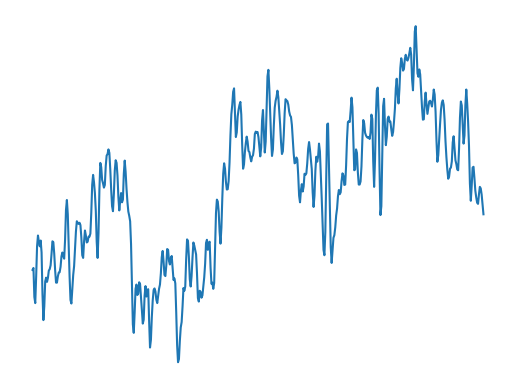

In [17]:
#пример сохранения изображения 
step = 500
plt.plot(df2['Voltage'][0:step])
plt.axis('off')
# Устанавливаем размер изображения (5.12 дюймов для 512 пикселей при 100 DPI)
#plt.gcf().set_size_inches(5.12, 5.12)
#plt.savefig('my_plot.png', dpi=100)
plt.show()

## Гиперпараметрами при сохранении изображения являются: 
### 1) Количество точек для отображения сигнала 
### 2) Разрешение изображения 

In [18]:
pain_marker = 0
for k in range(10000,11000+1):
    if df2.iloc[k]['Pain'] == 1:
        pain_marker = 1
print(pain_marker)

1


In [19]:
df2.iloc[10998]['Pain'] == 1

True

In [20]:
for k in range(2,10):
    print(k) 


2
3
4
5
6
7
8
9


In [38]:
# Путь к папке для сохранения файлов
save_dir = 'dataset'
pain_dir = os.path.join(save_dir, 'pain')
no_pain_dir = os.path.join(save_dir, 'no_pain')

# Создание папок, если их нет
if not os.path.exists(pain_dir):
    os.makedirs(pain_dir)
if not os.path.exists(no_pain_dir):
    os.makedirs(no_pain_dir)

# Шаг сегментации
step = 50
pain_segments = []
no_pain_segments = []

# Разделим данные на сегменты боли и без боли
for i in range(len(df2) // step):
    pain_marker = 0
    for k in range(i * step, (i + 1) * step):
        if df2.iloc[k]['Pain'] == 1:
            pain_marker = 1
            break  # Если хотя бы одна точка содержит боль, прерываем цикл

    # Сохраняем индексы сегментов
    if pain_marker == 1:
        pain_segments.append(i)
    else:
        no_pain_segments.append(i)

# Балансировка классов (оставляем случайные сегменты боли в том же количестве, что и сегменты без боли)
balanced_pain_segments = np.random.choice(pain_segments, len(no_pain_segments), replace=False)

# Функция для сохранения изображений
def save_plot(start_idx, folder, label):
    plt.plot(df2['Voltage'][start_idx*step:(start_idx+1)*step])
    plt.axis('off')
    plt.gcf().set_size_inches(5.12, 5.12)
    file_name = f'signal_{start_idx}_pain_{label}.png'
    file_path = os.path.join(folder, file_name)
    plt.savefig(file_path, dpi=100, bbox_inches='tight', format='png')
    plt.clf()  # Очищает текущую фигуру для следующего графика

# Сохранение изображений с болью
for idx in balanced_pain_segments:
    save_plot(idx, pain_dir, 1)

# Сохранение изображений без боли
for idx in no_pain_segments:
    save_plot(idx, no_pain_dir, 0)

print("Изображения успешно сохранены.")


Изображения успешно сохранены.


<Figure size 512x512 with 0 Axes>

In [ ]:
def save_eeg_images(dataset, resolution, step, patient_id):
    # Путь к папке для сохранения файлов
    save_dir = 'dataset'
    pain_dir = os.path.join(save_dir, 'pain')
    no_pain_dir = os.path.join(save_dir, 'no_pain')

    # Создание папок, если их нет
    if not os.path.exists(pain_dir):
        os.makedirs(pain_dir)
    if not os.path.exists(no_pain_dir):
        os.makedirs(no_pain_dir)

    # Разделим данные на сегменты боли и без боли
    pain_segments = []
    no_pain_segments = []

    for i in range(len(dataset) // step):
        pain_marker = 0
        for k in range(i * step, (i + 1) * step):
            if dataset.iloc[k]['Pain'] == 1:
                pain_marker = 1
                break  # Если хотя бы одна точка содержит боль, прерываем цикл

        # Сохраняем индексы сегментов
        if pain_marker == 1:
            pain_segments.append(i)
        else:
            no_pain_segments.append(i)

    # Балансировка классов (оставляем случайные сегменты боли в том же количестве, что и сегменты без боли)
    balanced_pain_segments = np.random.choice(pain_segments, len(no_pain_segments), replace=False)

    # Функция для сохранения изображений
    def save_plot(start_idx, folder, label):
        plt.plot(dataset['Voltage'][start_idx*step:(start_idx+1)*step])
        plt.axis('off')
        plt.gcf().set_size_inches(resolution / 100, resolution / 100)  # Устанавливаем разрешение
        file_name = f'signal_{patient_id}_{start_idx}_pain_{label}.png'  # Уникальное имя файла с ID пациента
        file_path = os.path.join(folder, file_name)
        plt.savefig(file_path, dpi=100, bbox_inches='tight', format='png')
        plt.clf()  # Очищает текущую фигуру для следующего графика

    # Сохранение изображений с болью
    for idx in balanced_pain_segments:
        save_plot(idx, pain_dir, 1)

    # Сохранение изображений без боли
    for idx in no_pain_segments:
        save_plot(idx, no_pain_dir, 0)

    print(f"Изображения для пациента {patient_id} успешно сохранены.")